In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
from xhistogram.xarray import histogram as xh
%reload_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
wn.filterwarnings('ignore')
cod = pd.read_csv('species/atlantic_cod.csv', header=0)
bass = pd.read_csv('species/stripped_bass.csv', header=0)
flounder = pd.read_csv('species/summer_flounder.csv', header=0)
seabream = pd.read_csv('species/seabream.csv', header=0)
red_drum = pd.read_csv('species/red_drum.csv', header=0)
n_lampfish = pd.read_csv('species/northern_lampfish.csv', header=0)
blue_lampfish = pd.read_csv('species/blue_lampfish.csv', header=0)
cunner = pd.read_csv('species/cunner.csv', header=0)
eelpout = pd.read_csv('species/eelpout.csv', header=0)

In [3]:
rootdir = '/local/rodgers/MI_JUL13_2020_RCP85'
filename = 'sfc_MI_tropical_ens1*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
trop_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
trop_avg = trop_all.mean(dim='ensemble')

In [4]:
rootdir = '/local/rodgers/MI_JUL13_2020_RCP85'
filename = 'sfc_MI_ens1*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
bass_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
bass_avg = bass_all.mean(dim='ensemble')

In [5]:
rootdir = '/local/rodgers/MI_JUL13_2020_RCP85'
filename = 'MI_cod_k01_ens1*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
cod_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
cod_avg = cod_all.mean(dim='ensemble')
codAvg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_cod_k01_ens131_1x1_1950_2100.nc')

In [6]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
hi_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
hi_avg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ens130_1x1_1950_2100.nc')

In [7]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_k01_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
lo_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
lo_avg = lo_all.mean(dim='ensemble')

In [8]:
lamp_all = (hi_all+lo_all)/2
lamp_avg = (hi_avg+lo_avg)/2

In [9]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':trop_avg['xt_ocean'],'yt_ocean':trop_avg['yt_ocean']})
oceanmask = np.isfinite(trop_avg['MI'].isel(time=0).squeeze())
area_masked = area.where(oceanmask,np.nan)
ds_total = ~np.isnan(area.where(oceanmask))
total = ds_total.sum(dim='yt_ocean').sum(dim='xt_ocean')

In [10]:
sea_all = trop_all*2.3
sea_avg = trop_avg*2.3

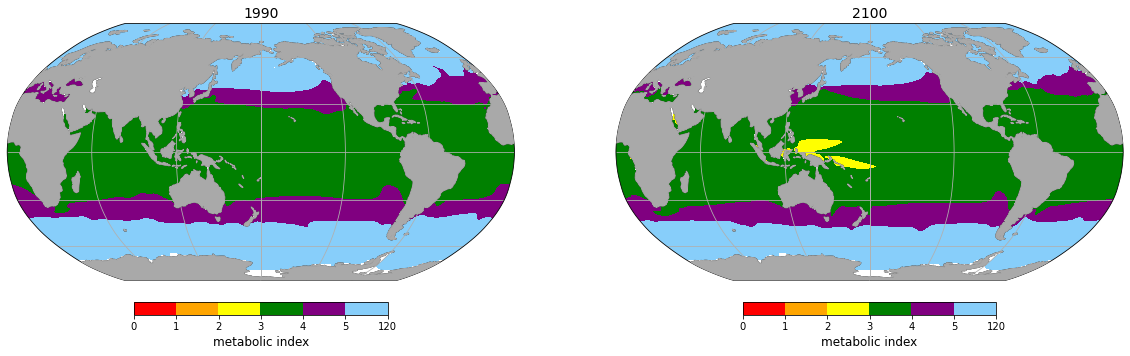

In [11]:
fig, (ax0, ax1) = plt.subplots(figsize=(20,8),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
func.graph(trop_avg, ax0, '1990', 1990, None, False)
func.graph(trop_avg, ax1, '2100', 2100, None, False)

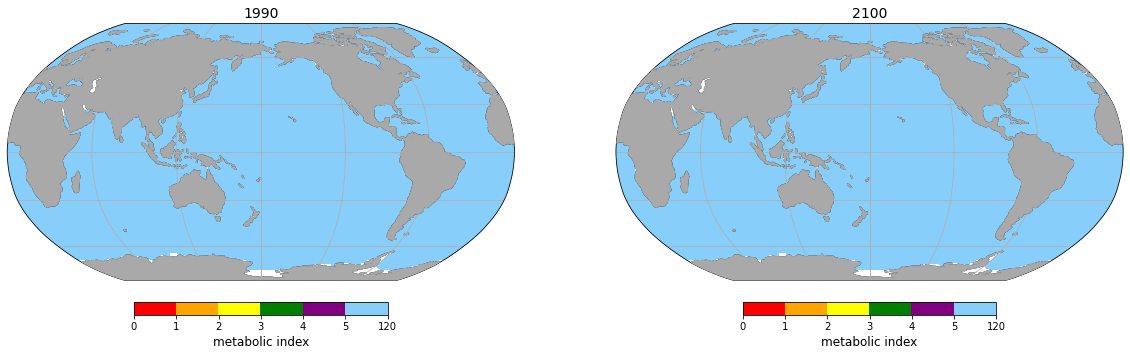

In [9]:
fig, (ax0, ax1) = plt.subplots(figsize=(20,8),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
func.graph(sea_avg, ax0, '1990', 1990, None, False)
func.graph(sea_avg, ax1, '2100', 2100, None, False)

# Atlantic Cod

#### E0 = 0.42, A0 = 15.6, MI-crit = 2.1-2.2

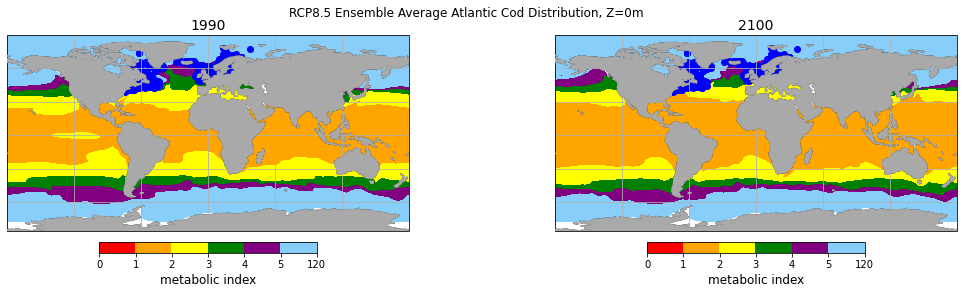

In [44]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Atlantic Cod Distribution, Z=0m')
func.graph(codAvg, ax0, '1990', 1990, None, False)
ax0.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='blue')
func.graph(codAvg, ax1, '2100', 2100, None, False)
ax1.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='blue')

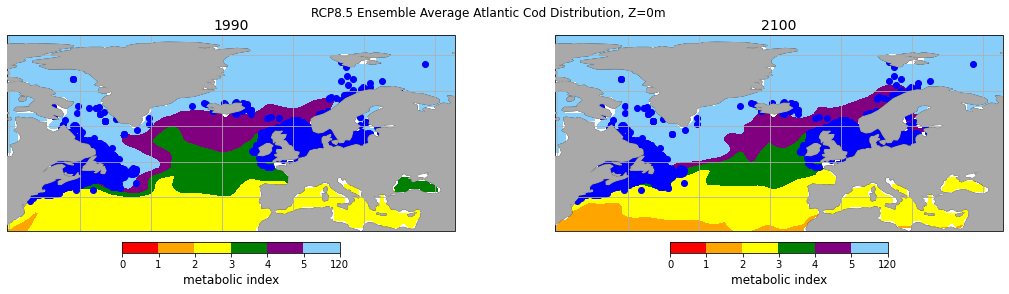

In [45]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-80.5,45.5,30.5,80.5]
fig.suptitle('RCP8.5 Ensemble Average Atlantic Cod Distribution, Z=0m')
func.graph(codAvg, ax0, '1990', 1990, coords, False)
ax0.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='blue')
func.graph(codAvg, ax1, '2100', 2100, coords, False)
ax1.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='blue')

In [31]:
cod_hab = func.species_hab(cod)
red_cod = func.mi_hab(cod_all, 1.0, cod_hab, area_masked)
or_cod = func.mi_hab(cod_all, 2.1, cod_hab, area_masked)
yel_cod = func.mi_hab(cod_all, 3.0, cod_hab, area_masked)
gr_cod = func.mi_hab(cod_all, 4.0, cod_hab, area_masked)
pur_cod = func.mi_hab(cod_all, 5.0, cod_hab, area_masked)

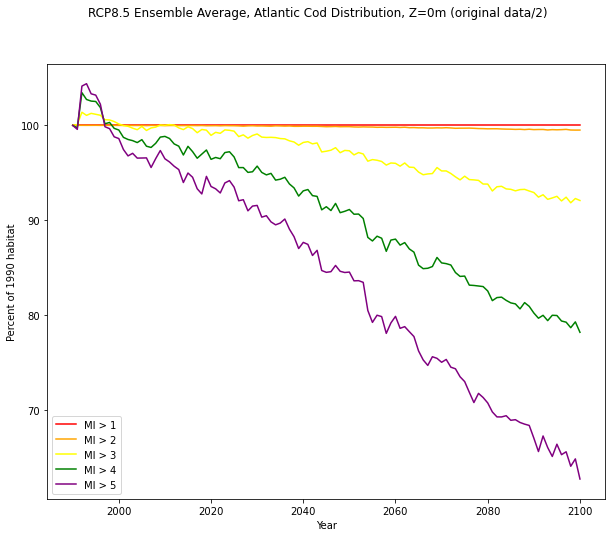

In [9]:
func.plot_dist(red_cod, or_cod, yel_cod, gr_cod, pur_cod, 'Atlantic Cod')

In [32]:
cod_hab = func.species_dist(cod)
red_cod2 = func.mi_dist(cod_all, 1.0, cod_hab, area_masked)
or_cod2 = func.mi_dist(cod_all, 2.1, cod_hab, area_masked)
yel_cod2 = func.mi_dist(cod_all, 3.0, cod_hab, area_masked)
gr_cod2 = func.mi_dist(cod_all, 4.0, cod_hab, area_masked)
pur_cod2 = func.mi_dist(cod_all, 5.0, cod_hab, area_masked)

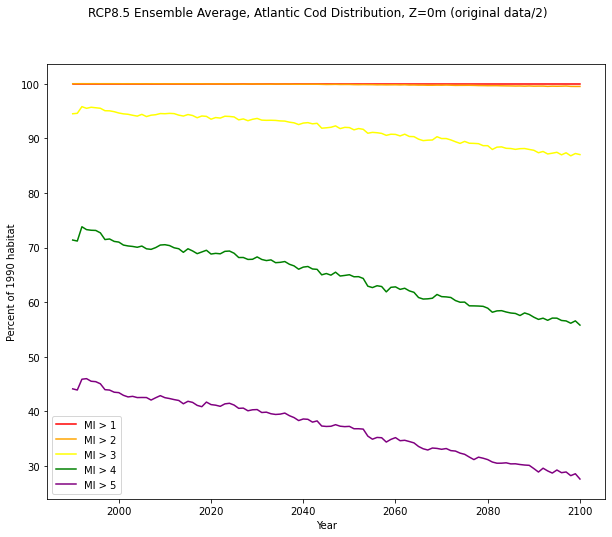

In [11]:
func.plot_dist(red_cod2, or_cod2, yel_cod2, gr_cod2, pur_cod2, 'Atlantic Cod')

# Striped Bass

#### E0 = 0.33, A0 = 24, MI-crit = 4.8-5.0

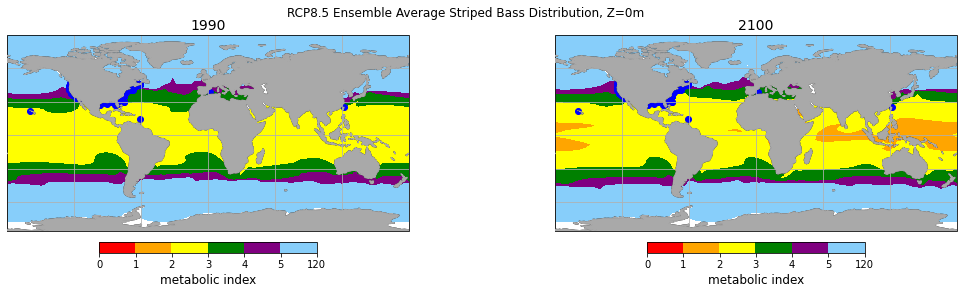

In [9]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Striped Bass Distribution, Z=0m')
func.graph(bass_avg, ax0, '1990', 1990, None, False)
ax0.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='blue')
func.graph(bass_avg, ax1, '2100', 2100, None, False)
ax1.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='blue')

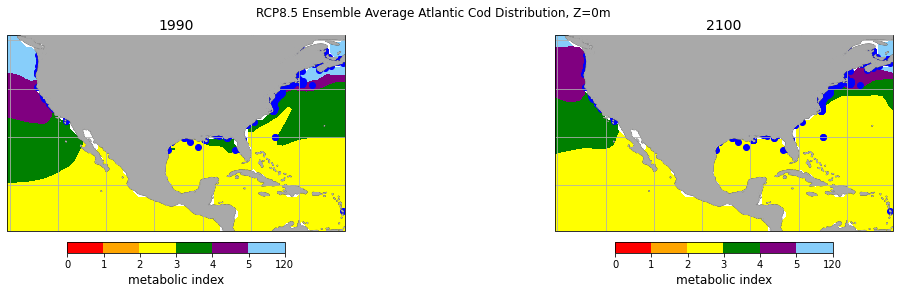

In [10]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-130.5,-60.5,10.5,45.5]
fig.suptitle('RCP8.5 Ensemble Average Atlantic Cod Distribution, Z=0m')
func.graph(bass_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='blue')
func.graph(bass_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='blue')

In [13]:
bass_hab = func.species_hab(bass)
red_bass = func.mi_hab(bass_all, 1.0, bass_hab, area_masked)
or_bass = func.mi_hab(bass_all, 2.0, bass_hab, area_masked)
yel_bass = func.mi_hab(bass_all, 3.0, bass_hab, area_masked)
gr_bass = func.mi_hab(bass_all, 4.0, bass_hab, area_masked)
pur_bass = func.mi_hab(bass_all, 5.0, bass_hab, area_masked)

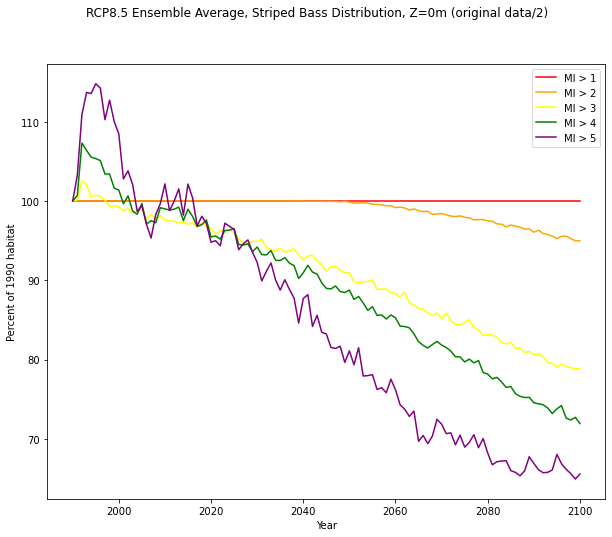

In [13]:
func.plot_dist(red_bass, or_bass, yel_bass, gr_bass, pur_bass, 'Striped Bass')

In [14]:
bass_hab = func.species_dist(bass)
red_bass2 = func.mi_dist(bass_all, 1.0, bass_hab, area_masked)
or_bass2 = func.mi_dist(bass_all, 2.0, bass_hab, area_masked)
yel_bass2 = func.mi_dist(bass_all, 3.0, bass_hab, area_masked)
gr_bass2 = func.mi_dist(bass_all, 4.0, bass_hab, area_masked)
pur_bass2 = func.mi_dist(bass_all, 5.0, bass_hab, area_masked)

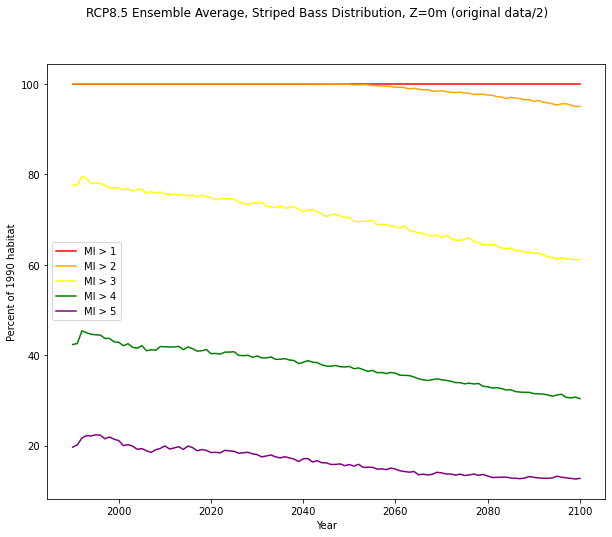

In [15]:
func.plot_dist(red_bass2, or_bass2, yel_bass2, gr_bass2, pur_bass2, 'Striped Bass')

# Summer Flounder

#### E0 = 0.35, A0 = 25.1, MI-crit = 3.5-3.6

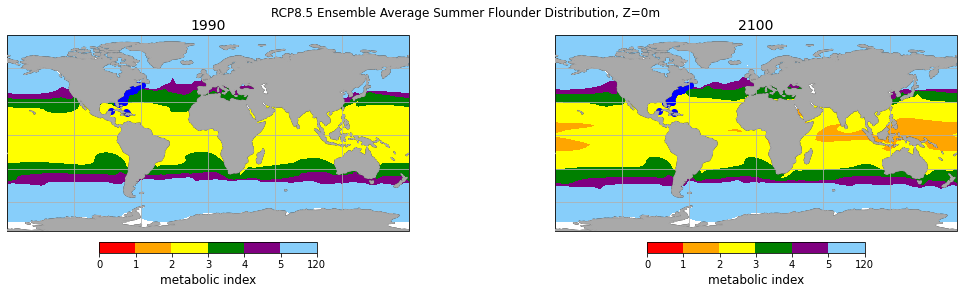

In [17]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Summer Flounder Distribution, Z=0m')
func.graph(bass_avg, ax0, '1990', 1990, None, False)
ax0.scatter(flounder['decimalLongitude'], flounder['decimalLatitude'],color='blue')
func.graph(bass_avg, ax1, '2100', 2100, None, False)
ax1.scatter(flounder['decimalLongitude'], flounder['decimalLatitude'],color='blue')

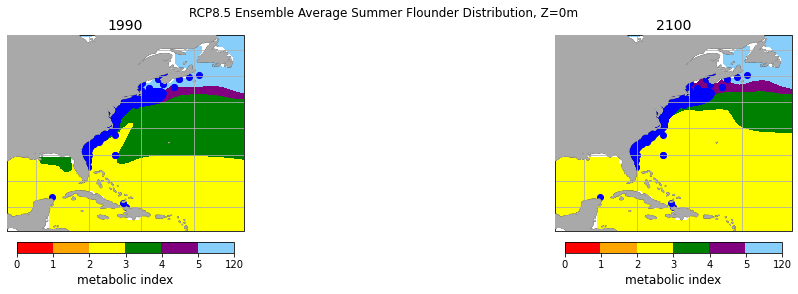

In [18]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-95.5,-50.5,15.5,50.5]
fig.suptitle('RCP8.5 Ensemble Average Summer Flounder Distribution, Z=0m')
func.graph(bass_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(flounder['decimalLongitude'], flounder['decimalLatitude'],color='blue')
func.graph(bass_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(flounder['decimalLongitude'], flounder['decimalLatitude'],color='blue')

In [33]:
flounder_hab = func.species_hab(flounder)
red_flounder = func.mi_hab(bass_all, 1.0, flounder_hab, area_masked)
or_flounder = func.mi_hab(bass_all, 2.0, flounder_hab, area_masked)
yel_flounder = func.mi_hab(bass_all, 3.5, flounder_hab, area_masked)
gr_flounder = func.mi_hab(bass_all, 4.0, flounder_hab, area_masked)
pur_flounder = func.mi_hab(bass_all, 5.0, flounder_hab, area_masked)

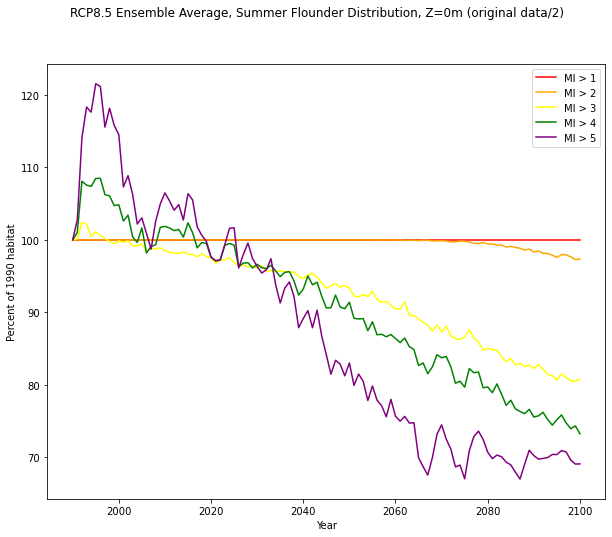

In [17]:
func.plot_dist(red_flounder, or_flounder, yel_flounder, gr_flounder, pur_flounder, 'Summer Flounder')

In [34]:
flounder_hab = func.species_dist(flounder)
red_flounder2 = func.mi_dist(bass_all, 1.0, flounder_hab, area_masked)
or_flounder2 = func.mi_dist(bass_all, 2.0, flounder_hab, area_masked)
yel_flounder2 = func.mi_dist(bass_all, 3.5, flounder_hab, area_masked)
gr_flounder2 = func.mi_dist(bass_all, 4.0, flounder_hab, area_masked)
pur_flounder2 = func.mi_dist(bass_all, 5.0, flounder_hab, area_masked)

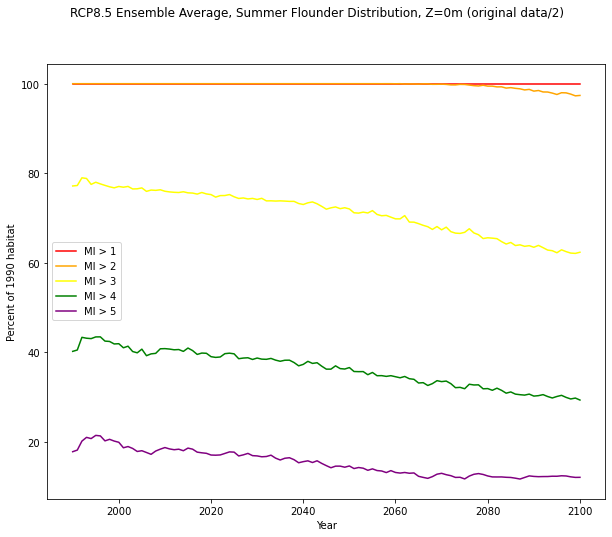

In [20]:
func.plot_dist(red_flounder2, or_flounder2, yel_flounder2, gr_flounder2, pur_flounder2, 'Summer Flounder')

# Sharpsnout Seabream

#### E0 = 0.23, A0 = 53.9, MI-crit = 4.2

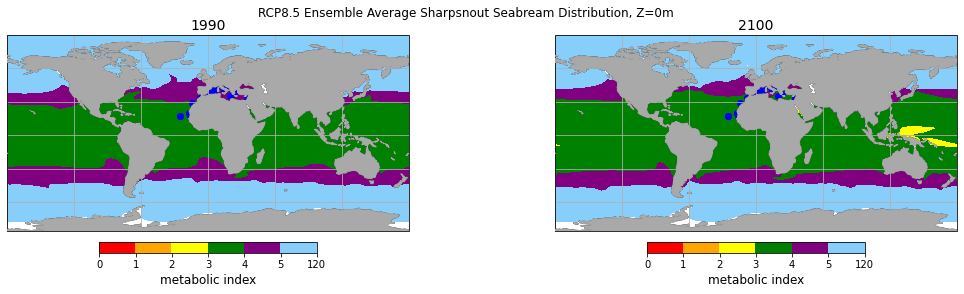

In [11]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Sharpsnout Seabream Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, None, False)
ax0.scatter(seabream['decimalLongitude'], seabream['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, None, False)
ax1.scatter(seabream['decimalLongitude'], seabream['decimalLatitude'],color='blue')

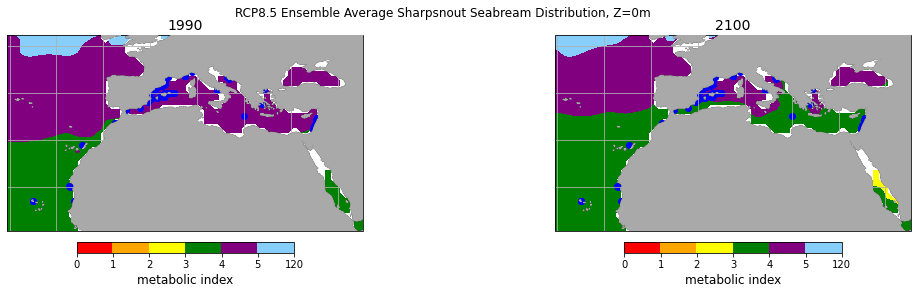

In [12]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-30.5,45.5,10.5,45.5]
fig.suptitle('RCP8.5 Ensemble Average Sharpsnout Seabream Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(seabream['decimalLongitude'], seabream['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(seabream['decimalLongitude'], seabream['decimalLatitude'],color='blue')

In [35]:
seabream_hab = func.species_hab(seabream)
red_seabream = func.mi_hab(trop_all, 1.0, seabream_hab, area_masked)
or_seabream = func.mi_hab(trop_all, 2.0, seabream_hab, area_masked)
yel_seabream = func.mi_hab(trop_all, 3.0, seabream_hab, area_masked)
gr_seabream = func.mi_hab(trop_all, 4.2, seabream_hab, area_masked)
pur_seabream = func.mi_hab(trop_all, 5.0, seabream_hab, area_masked)

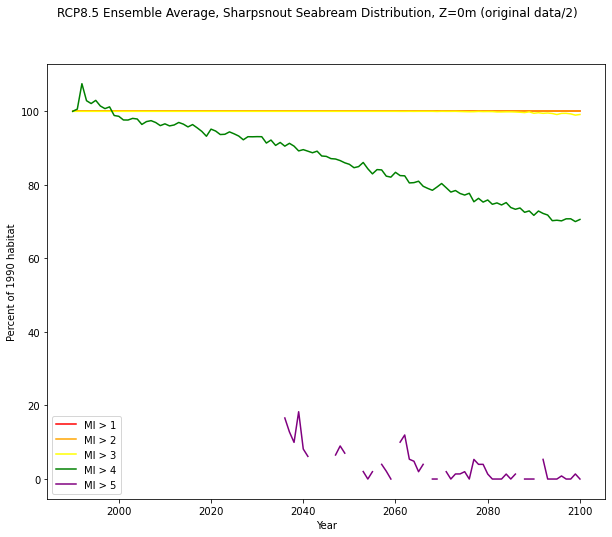

In [16]:
func.plot_dist(red_seabream, or_seabream, yel_seabream, gr_seabream, pur_seabream, 'Sharpsnout Seabream')

In [36]:
seabream_hab = func.species_dist(seabream)
red_seabream2 = func.mi_dist(trop_all, 1.0, seabream_hab, area_masked)
or_seabream2 = func.mi_dist(trop_all, 2.0, seabream_hab, area_masked)
yel_seabream2 = func.mi_dist(trop_all, 3.0, seabream_hab, area_masked)
gr_seabream2 = func.mi_dist(trop_all, 4.2, seabream_hab, area_masked)
pur_seabream2 = func.mi_dist(trop_all, 5.0, seabream_hab, area_masked)

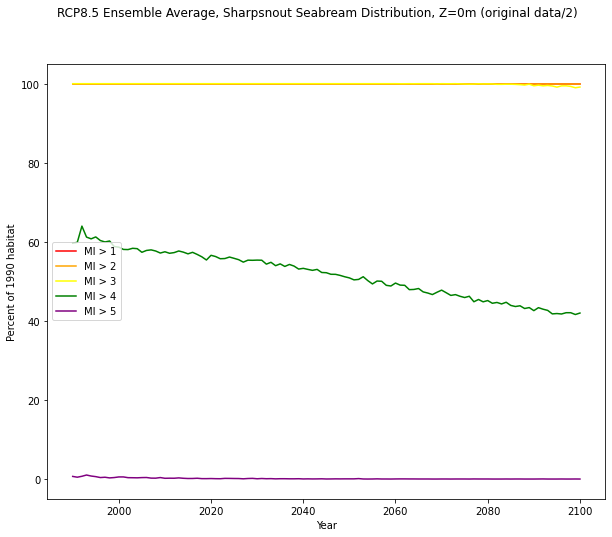

In [23]:
func.plot_dist(red_seabream2, or_seabream2, yel_seabream2, gr_seabream2, pur_seabream2, 'Sharpsnout Seabream')

# Red Drum

#### E0 = 0.24, A0 = 32.3, MI-crit = 5.0-5.1

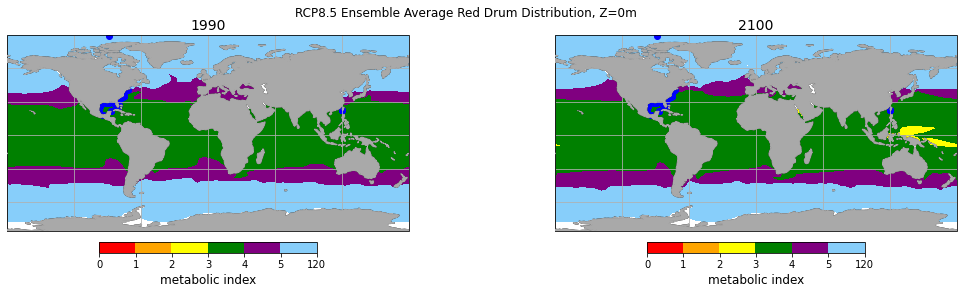

In [17]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Red Drum Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, None, False)
ax0.scatter(red_drum['decimalLongitude'], red_drum['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, None, False)
ax1.scatter(red_drum['decimalLongitude'], red_drum['decimalLatitude'],color='blue')

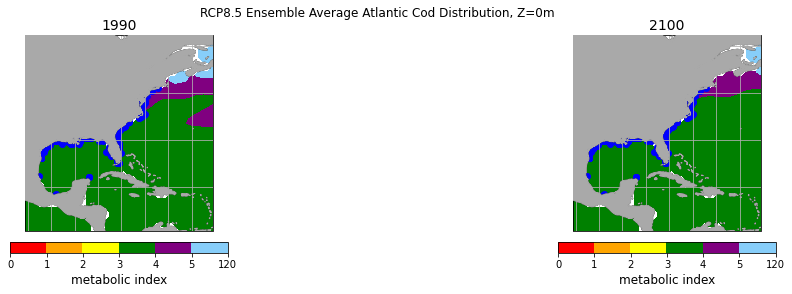

In [18]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-100.5,-60.5,10.5,50.5]
fig.suptitle('RCP8.5 Ensemble Average Atlantic Cod Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(red_drum['decimalLongitude'], red_drum['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(red_drum['decimalLongitude'], red_drum['decimalLatitude'],color='blue')

In [19]:
drum_hab = func.species_hab(red_drum)
red_dr = func.mi_hab(trop_all, 1.0, drum_hab, area_masked)
or_drum = func.mi_hab(trop_all, 2.0, drum_hab, area_masked)
yel_drum = func.mi_hab(trop_all, 3.0, drum_hab, area_masked)
gr_drum = func.mi_hab(trop_all, 4.0, drum_hab, area_masked)
pur_drum = func.mi_hab(trop_all, 5.0, drum_hab, area_masked)

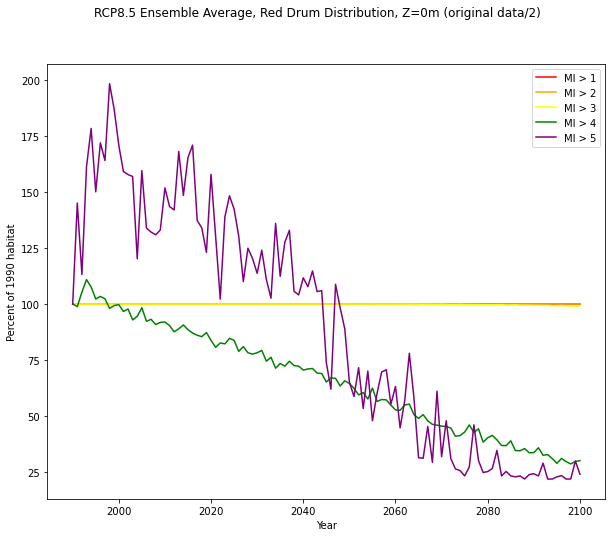

In [20]:
func.plot_dist(red_drum, or_drum, yel_drum, gr_drum, pur_drum, 'Red Drum')

In [20]:
drum_hab = func.species_dist(red_drum)
red_dr2 = func.mi_dist(trop_all, 1.0, drum_hab, area_masked)
or_drum2 = func.mi_dist(trop_all, 2.0, drum_hab, area_masked)
yel_drum2 = func.mi_dist(trop_all, 3.0, drum_hab, area_masked)
gr_drum2 = func.mi_dist(trop_all, 4.0, drum_hab, area_masked)
pur_drum2 = func.mi_dist(trop_all, 5.0, drum_hab, area_masked)

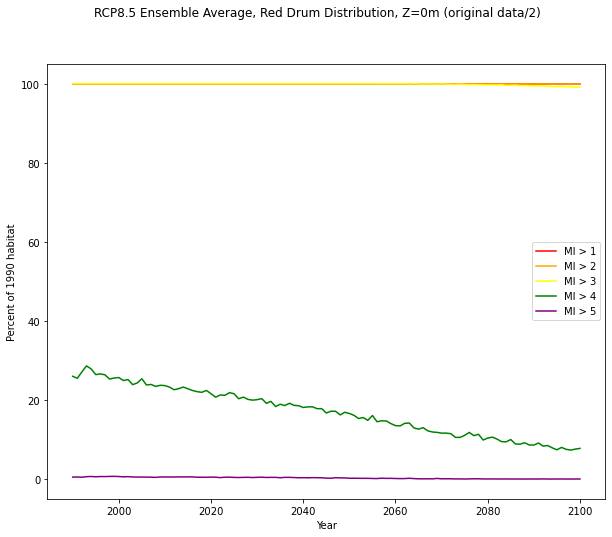

In [30]:
func.plot_dist(red_dr2, or_drum2, yel_drum2, gr_drum2, pur_drum2, 'Red Drum')

# Northern Lampfish

#### E0 = 0.69, A0 = 23.4, MI-crit = 2.2-4.4

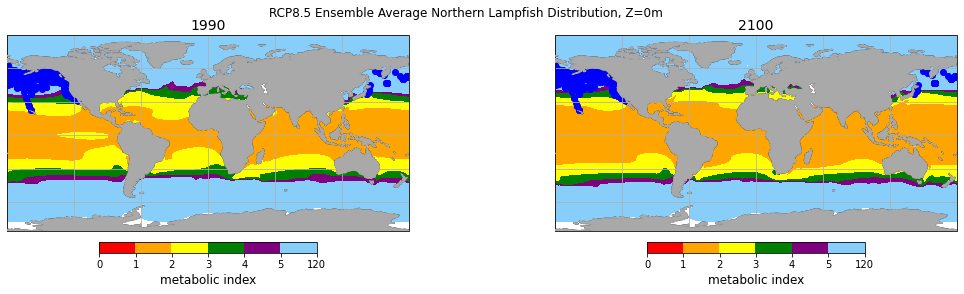

In [31]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Northern Lampfish Distribution, Z=0m')
func.graph(lamp_avg, ax0, '1990', 1990, None, False)
ax0.scatter(n_lampfish['decimalLongitude'], n_lampfish['decimalLatitude'],color='blue')
func.graph(lamp_avg, ax1, '2100', 2100, None, False)
ax1.scatter(n_lampfish['decimalLongitude'], n_lampfish['decimalLatitude'],color='blue')

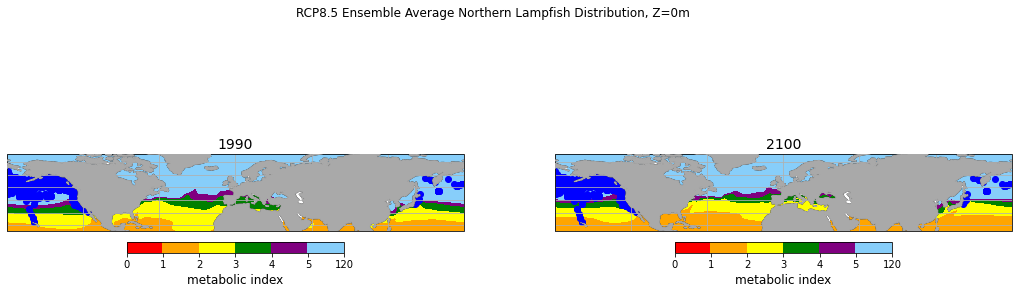

In [32]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [135.5,-110.5,15.5,65.5]
fig.suptitle('RCP8.5 Ensemble Average Northern Lampfish Distribution, Z=0m')
func.graph(lamp_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(n_lampfish['decimalLongitude'], n_lampfish['decimalLatitude'],color='blue')
func.graph(lamp_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(n_lampfish['decimalLongitude'], n_lampfish['decimalLatitude'],color='blue')

In [37]:
lamp_hab = func.species_hab(n_lampfish)
red_lamp = func.mi_hab(lamp_all, 1.0, lamp_hab, area_masked)
or_lamp = func.mi_hab(lamp_all, 2.2, lamp_hab, area_masked)
yel_lamp = func.mi_hab(lamp_all, 3.0, lamp_hab, area_masked)
gr_lamp = func.mi_hab(lamp_all, 4.4, lamp_hab, area_masked)
pur_lamp = func.mi_hab(lamp_all, 5.0, lamp_hab, area_masked)

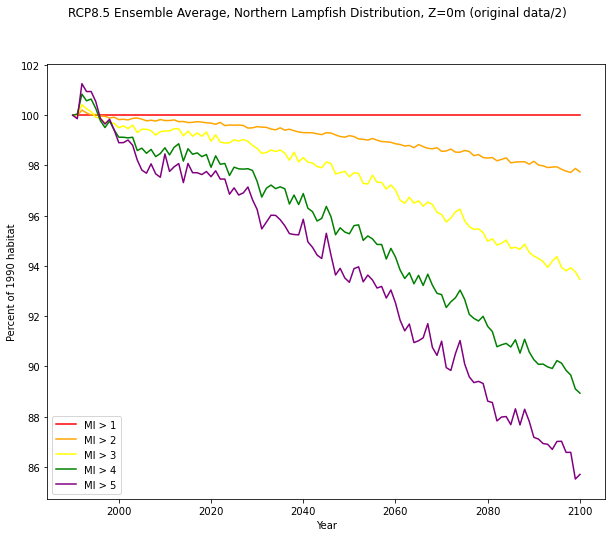

In [37]:
func.plot_dist(red_lamp, or_lamp, yel_lamp, gr_lamp, pur_lamp, 'Northern Lampfish')

In [38]:
lamp_hab = func.species_dist(n_lampfish)
red_lamp2 = func.mi_dist(lamp_all, 1.0, lamp_hab, area_masked)
or_lamp2 = func.mi_dist(lamp_all, 2.2, lamp_hab, area_masked)
yel_lamp2 = func.mi_dist(lamp_all, 3.0, lamp_hab, area_masked)
gr_lamp2 = func.mi_dist(lamp_all, 4.4, lamp_hab, area_masked)
pur_lamp2 = func.mi_dist(lamp_all, 5.0, lamp_hab, area_masked)

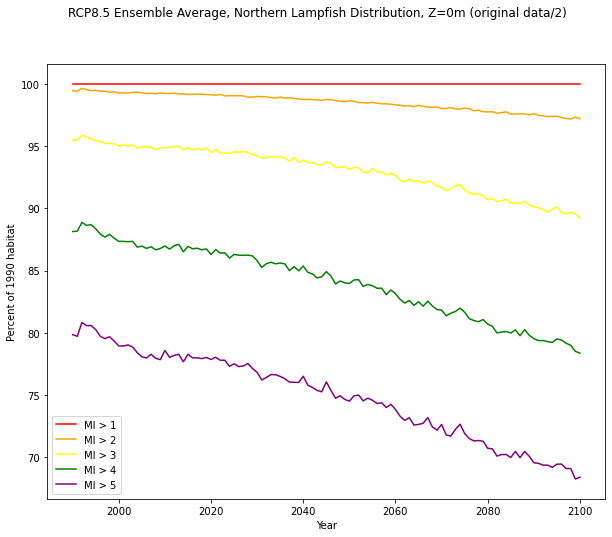

In [40]:
func.plot_dist(red_lamp2, or_lamp2, yel_lamp2, gr_lamp2, pur_lamp2, 'Northern Lampfish')

# Blue Lampfish

#### E0 = 0.21, A0 = 20.6, MI-crit = 2.6-4.8

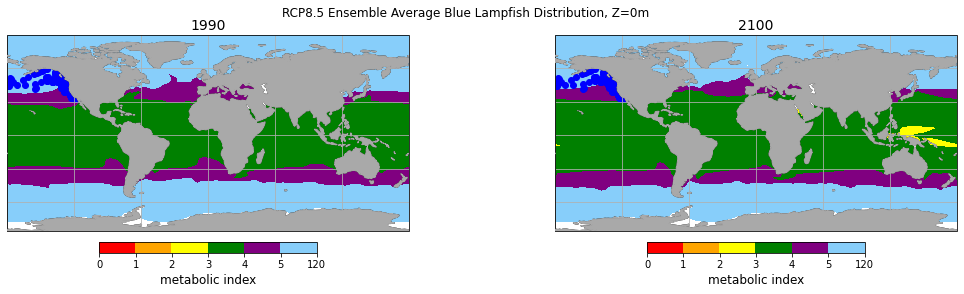

In [31]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Blue Lampfish Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, None, False)
ax0.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, None, False)
ax1.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')

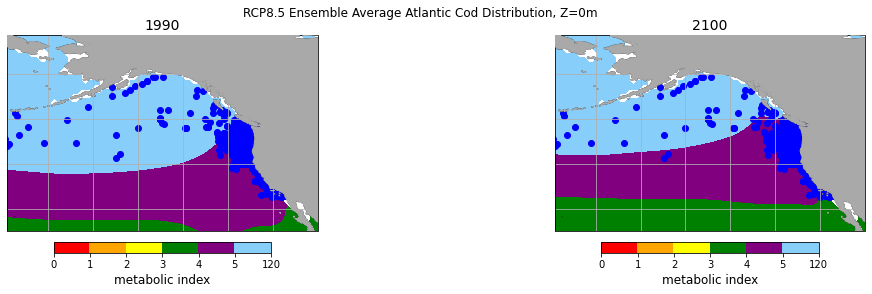

In [32]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-179,-110,25,65]
fig.suptitle('RCP8.5 Ensemble Average Atlantic Cod Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')

In [39]:
blue_hab = func.species_hab(blue_lampfish)
red_blue = func.mi_hab(trop_all, 1.0, blue_hab, area_masked)
or_blue = func.mi_hab(trop_all, 2.6, blue_hab, area_masked)
yel_blue = func.mi_hab(trop_all, 3.0, blue_hab, area_masked)
gr_blue = func.mi_hab(trop_all, 4.8, blue_hab, area_masked)
pur_blue = func.mi_hab(trop_all, 5.0, blue_hab, area_masked)

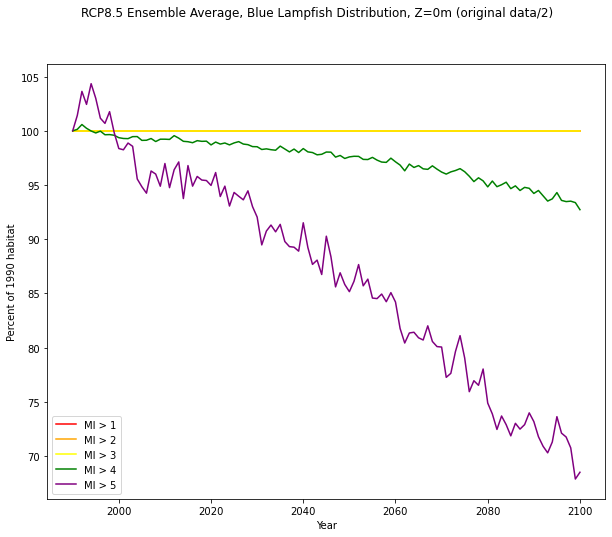

In [34]:
func.plot_dist(red_blue, or_blue, yel_blue, gr_blue, pur_blue, 'Blue Lampfish')

In [40]:
blue_hab = func.species_dist(blue_lampfish)
red_blue2 = func.mi_dist(trop_all, 1.0, blue_hab, area_masked)
or_blue2 = func.mi_dist(trop_all, 2.6, blue_hab, area_masked)
yel_blue2 = func.mi_dist(trop_all, 3.0, blue_hab, area_masked)
gr_blue2 = func.mi_dist(trop_all, 4.8, blue_hab, area_masked)
pur_blue2 = func.mi_dist(trop_all, 5.0, blue_hab, area_masked)

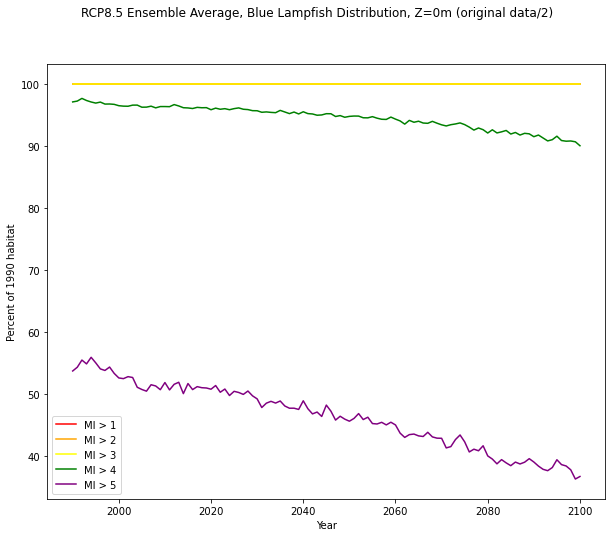

In [25]:
func.plot_dist(red_blue2, or_blue2, yel_blue2, gr_blue2, pur_blue2, 'Blue Lampfish')

# Cunner

#### E0 = 0.22, A0 = 22.2, MI-crit = 3.8-4.0

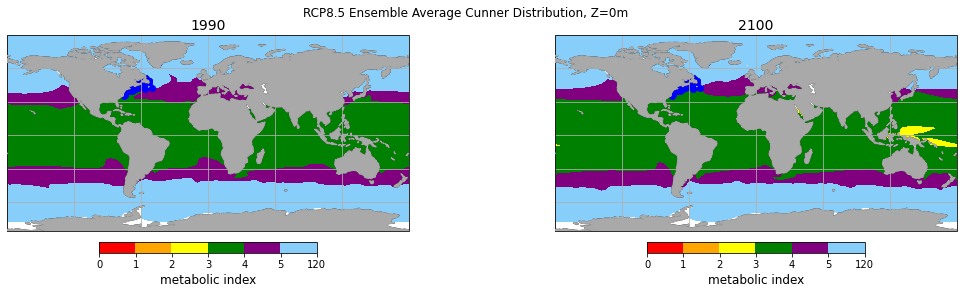

In [35]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Cunner Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, None, False)
ax0.scatter(cunner['decimalLongitude'], cunner['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, None, False)
ax1.scatter(cunner['decimalLongitude'], cunner['decimalLatitude'],color='blue')

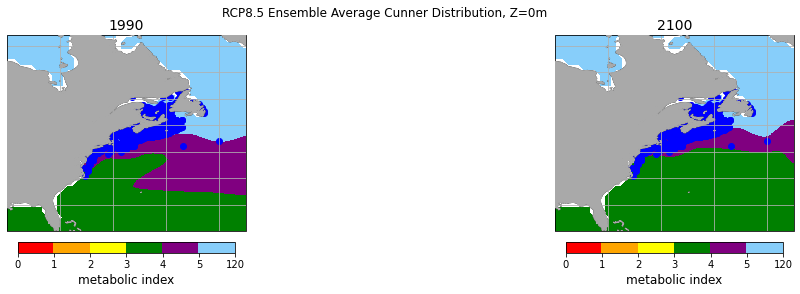

In [36]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-90,-45,25,60]
fig.suptitle('RCP8.5 Ensemble Average Cunner Distribution, Z=0m')
func.graph(trop_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(cunner['decimalLongitude'], cunner['decimalLatitude'],color='blue')
func.graph(trop_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(cunner['decimalLongitude'], cunner['decimalLatitude'],color='blue')

In [25]:
cunner_hab = func.species_hab(cunner)
red_cunner = func.mi_hab(trop_all, 1.0, cunner_hab, area_masked)
or_cunner = func.mi_hab(trop_all, 2.0, cunner_hab, area_masked)
yel_cunner = func.mi_hab(trop_all, 3.0, cunner_hab, area_masked)
gr_cunner = func.mi_hab(trop_all, 4.0, cunner_hab, area_masked)
pur_cunner = func.mi_hab(trop_all, 5.0, cunner_hab, area_masked)

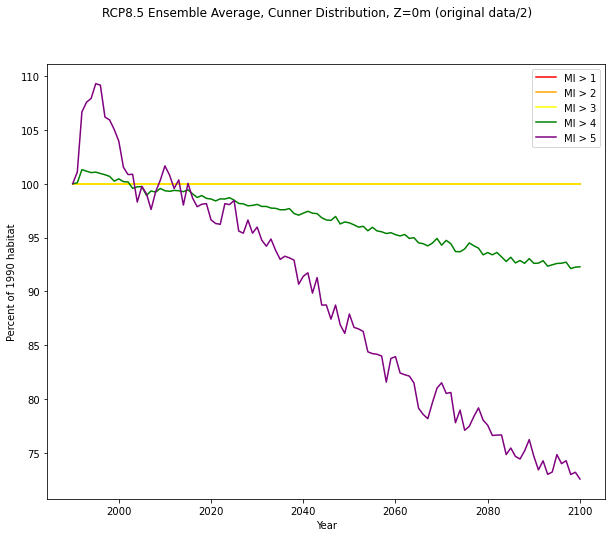

In [40]:
func.plot_dist(red_cunner, or_cunner, yel_cunner, gr_cunner, pur_cunner, 'Cunner')

In [26]:
cunner_hab = func.species_dist(cunner)
red_cunner2 = func.mi_dist(trop_all, 1.0, cunner_hab, area_masked)
or_cunner2 = func.mi_dist(trop_all, 2.0, cunner_hab, area_masked)
yel_cunner2 = func.mi_dist(trop_all, 3.0, cunner_hab, area_masked)
gr_cunner2 = func.mi_dist(trop_all, 4.0, cunner_hab, area_masked)
pur_cunner2 = func.mi_dist(trop_all, 5.0, cunner_hab, area_masked)

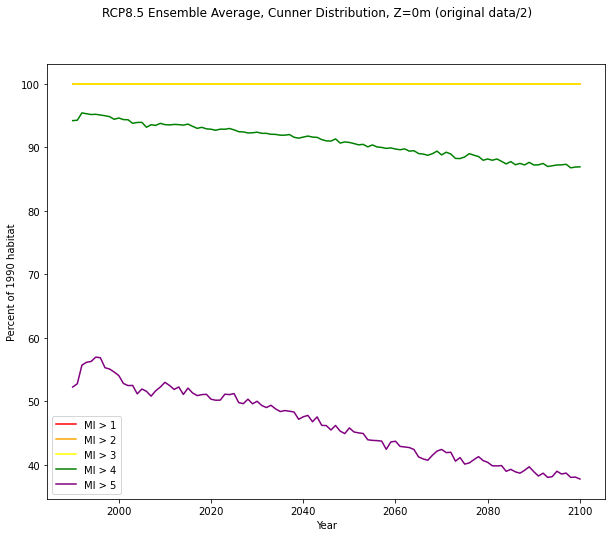

In [42]:
func.plot_dist(red_cunner2, or_cunner2, yel_cunner2, gr_cunner2, pur_cunner2, 'Cunner')

# Viviparous Eelpout

#### E0 = 0.85, A0 = 18.2, MI-crit = 3.6-4.4

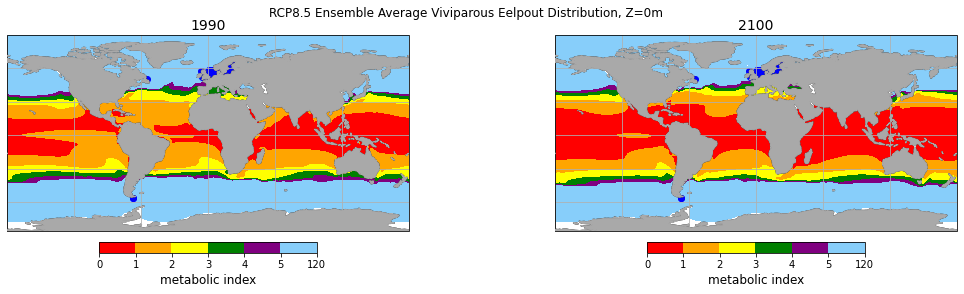

In [42]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Viviparous Eelpout Distribution, Z=0m')
func.graph(hi_avg, ax0, '1990', 1990, None, False)
ax0.scatter(eelpout['decimalLongitude'], eelpout['decimalLatitude'],color='blue')
func.graph(hi_avg, ax1, '2100', 2100, None, False)
ax1.scatter(eelpout['decimalLongitude'], eelpout['decimalLatitude'],color='blue')

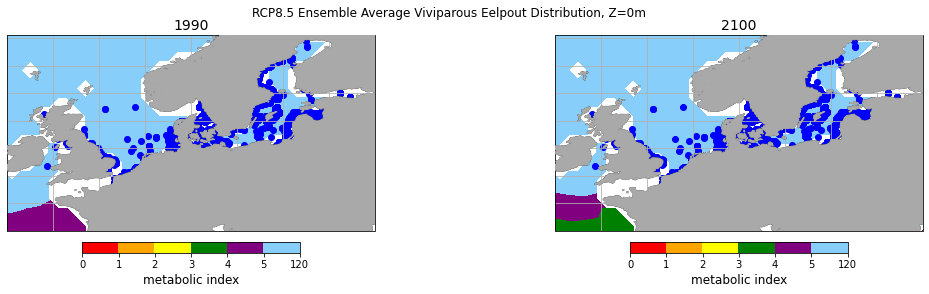

In [43]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,4),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-10,30,45,65]
fig.suptitle('RCP8.5 Ensemble Average Viviparous Eelpout Distribution, Z=0m')
func.graph(hi_avg, ax0, '1990', 1990, coords, False)
ax0.scatter(eelpout['decimalLongitude'], eelpout['decimalLatitude'],color='blue')
func.graph(hi_avg, ax1, '2100', 2100, coords, False)
ax1.scatter(eelpout['decimalLongitude'], eelpout['decimalLatitude'],color='blue')

In [41]:
eel_hab = func.species_hab(eelpout)
red_eel = func.mi_hab(hi_all, 1.0, eel_hab, area_masked)
or_eel = func.mi_hab(hi_all, 2.0, eel_hab, area_masked)
yel_eel = func.mi_hab(hi_all, 3.6, eel_hab, area_masked)
gr_eel = func.mi_hab(hi_all, 4.4, eel_hab, area_masked)
pur_eel = func.mi_hab(hi_all, 5.0, eel_hab, area_masked)

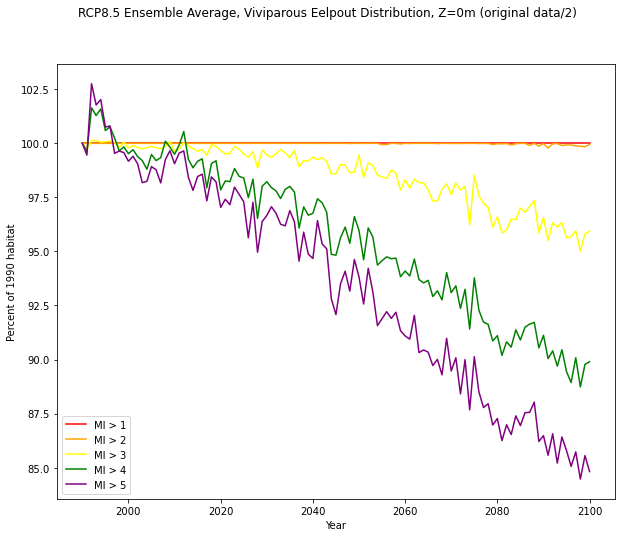

In [45]:
func.plot_dist(red_eel, or_eel, yel_eel, gr_eel, pur_eel, 'Viviparous Eelpout')

In [42]:
eel_hab = func.species_dist(eelpout)
red_eel2 = func.mi_dist(hi_all, 1.0, eel_hab, area_masked)
or_eel2 = func.mi_dist(hi_all, 2.0, eel_hab, area_masked)
yel_eel2 = func.mi_dist(hi_all, 3.6, eel_hab, area_masked)
gr_eel2 = func.mi_dist(hi_all, 4.4, eel_hab, area_masked)
pur_eel2 = func.mi_dist(hi_all, 5.0, eel_hab, area_masked)

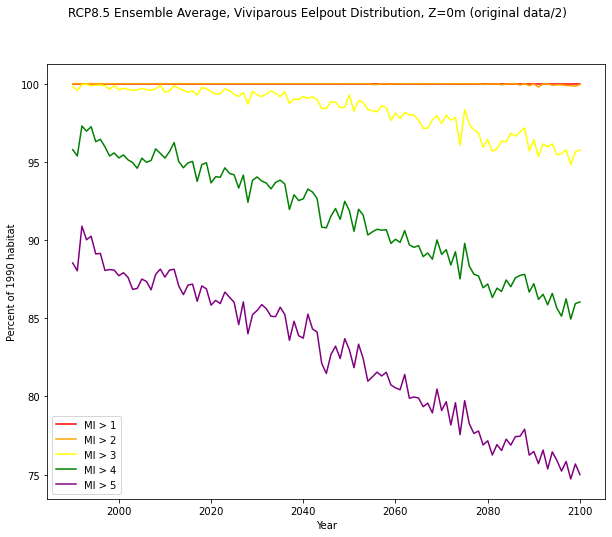

In [47]:
func.plot_dist(red_eel2, or_eel2, yel_eel2, gr_eel2, pur_eel2, 'Viviparous Eelpout')

# Summary

Text(0, 0.5, 'Percent of 1990 habitat')

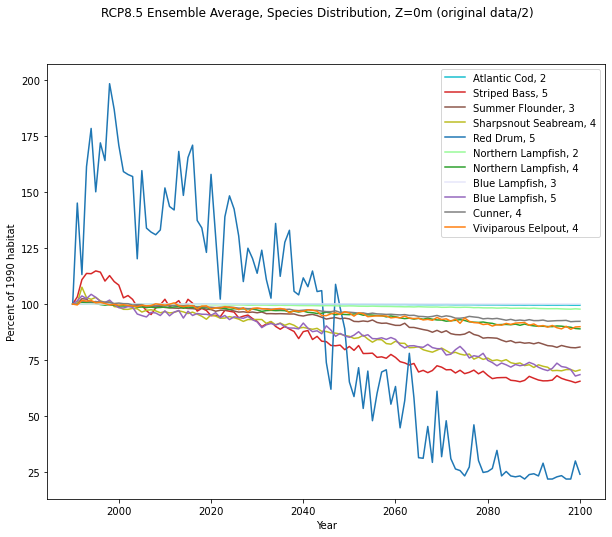

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Ensemble Average, Species Distribution, Z=0m (original data/2)')
ax.plot(np.unique(or_cod['year']),or_cod,color='tab:cyan',label='Atlantic Cod, 2')
ax.plot(np.unique(pur_bass['year']),pur_bass,color='tab:red',label='Striped Bass, 5')
ax.plot(np.unique(yel_flounder['year']),yel_flounder,color='tab:brown',label='Summer Flounder, 3')
ax.plot(np.unique(gr_seabream['year']),gr_seabream,color='tab:olive',label='Sharpsnout Seabream, 4')
ax.plot(np.unique(pur_drum['year']),pur_drum,color='tab:blue',label='Red Drum, 5')
ax.plot(np.unique(or_lamp['year']),or_lamp,color='palegreen',label='Northern Lampfish, 2')
ax.plot(np.unique(gr_lamp['year']),gr_lamp,color='tab:green',label='Northern Lampfish, 4')
ax.plot(np.unique(yel_blue['year']),yel_blue,color='lavender',label='Blue Lampfish, 3')
ax.plot(np.unique(pur_blue['year']),pur_blue,color='tab:purple',label='Blue Lampfish, 5')
ax.plot(np.unique(gr_cunner['year']),gr_cunner,color='tab:gray',label='Cunner, 4')
ax.plot(np.unique(gr_eel['year']),gr_eel,color='tab:orange',label='Viviparous Eelpout, 4')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Percent of 1990 habitat')

In [49]:
lampO = [100.        , 100.06696967,  99.99202034, 100.06836137,
       100.14147666, 100.02683727,  99.98000751,  99.95336713,
        99.88644318, 100.03196925,  99.9684477 ,  99.96717672,
       100.03438224,  99.94876052,  99.88295534,  99.88323323,
        99.88851944,  99.91997916,  99.89384688,  99.83072939,
        99.78875127,  99.76492235,  99.84067441,  99.68973655,
        99.74424035,  99.76452985,  99.74257384,  99.72563254,
        99.60820742,  99.5813949 ,  99.64031184,  99.60330732,
        99.64310189,  99.51756815,  99.48125809,  99.56802259,
        99.48218681,  99.49844945,  99.4895504 ,  99.38895306,
        99.37992112,  99.35236305,  99.35069668,  99.30620122,
        99.26478858,  99.29316201,  99.31613911,  99.25082608,
        99.19600248,  99.13165825,  99.25651809,  99.15149693,
        99.05308801,  98.98260343,  98.98974034,  99.08950051,
        98.96366967,  98.92029714,  98.88436122,  98.88844922,
        98.82046661,  98.7889348 ,  98.66355067,  98.72422978,
        98.59281927,  98.70940761,  98.68153728,  98.61228463,
        98.57656531,  98.58038465,  98.42292042,  98.49494222,
        98.53373833,  98.48255139,  98.42218761,  98.52918591,
        98.44960568,  98.28597573,  98.2911603 ,  98.20456001,
        98.16461608,  98.17396073,  98.13909989,  98.16037601,
        98.17727356,  98.0070372 ,  98.00792855,  98.05571114,
        98.06890385,  97.97952683,  98.0475237 ,  97.9117331 ,
        97.89235105,  97.80263112,  97.81507871,  97.90107623,
        97.77281445,  97.67111337,  97.68750336,  97.80563418,
        97.65723802]
lampG = [100.        ,  99.94125899,  99.98490252,  99.96773921,
        99.32403621,  99.44622721,  99.0875829 ,  99.35543762,
        98.99809484,  99.07215044,  99.71381021,  99.10943547,
        99.3125898 ,  99.63932972,  98.85732089,  99.43444473,
        98.97141692,  99.14064258,  99.06326513,  99.28582207,
        98.72178003,  99.24360347,  98.69396234,  98.83342123,
        98.30237746,  98.47365467,  98.43477094,  98.5116686 ,
        98.5073894 ,  98.2347915 ,  97.84244939,  97.14051251,
        97.45578819,  97.68555727,  97.55947239,  97.55298577,
        97.56448036,  96.91743168,  97.26307173,  96.95035323,
        97.37992451,  96.75890089,  96.52491374,  96.27526642,
        96.10632584,  96.90446312,  96.31902841,  95.59169634,
        95.77438027,  95.59877663,  95.44304463,  95.91322716,
        95.84652884,  95.37420072,  95.51706199,  95.35366571,
        95.14638785,  95.16134368,  94.65012719,  95.00457458,
        94.7031457 ,  93.87024677,  93.64121337,  93.81103479,
        93.24962397,  93.52825522,  93.40589467,  93.79463946,
        93.19272532,  92.87822233,  93.10997204,  92.39146676,
        92.34612803,  92.75194332,  93.10909948,  92.57340393,
        92.03648131,  91.87566719,  91.73245122,  91.76771221,
        91.23820403,  91.08489964,  90.39604925,  90.53596504,
        90.57409506,  90.27414349,  90.76813854,  90.12368075,
        90.85441165,  90.28770525,  89.92422496,  89.8268414 ,
        89.66399527,  89.66095951,  89.50380325,  89.80205635,
        89.74082323,  89.33973464,  89.27917918,  88.5140371 ,
        88.43632052]

In [50]:
blueO = [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100.]
blueG = [100.        ,  99.80482893, 100.09283377, 100.79752716,
        98.36422413,  97.82549577,  97.19755618,  99.03374883,
        97.92425071,  97.31262765,  99.35976472,  97.62194948,
        98.79442297,  99.534551  ,  96.62719187,  98.69904481,
        97.58931623,  98.26766686,  98.24917527,  98.29051844,
        97.21190171,  98.68395424,  96.85348036,  97.92312952,
        96.2043166 ,  97.11930415,  96.83316779,  96.67322265,
        97.11465549,  95.99124088,  95.46445501,  93.22059212,
        94.09408155,  94.37579768,  94.01647508,  94.70042715,
        94.02004969,  92.96379664,  93.42454923,  92.94776081,
        94.87709919,  92.90719396,  91.72961337,  91.52017152,
        90.96949013,  93.49829513,  92.01275815,  89.76204306,
        90.16387019,  90.04383283,  89.41008824,  90.4843189 ,
        91.15563033,  89.79489137,  90.4654374 ,  89.61601222,
        88.65240687,  89.30052569,  88.56738572,  89.31403776,
        88.38203555,  86.675513  ,  85.04042426,  86.21394484,
        85.58797357,  85.65107578,  85.17266916,  86.26875405,
        85.12331904,  84.86938923,  85.12796357,  83.28958091,
        83.17396093,  84.63735289,  85.50531351,  84.10610247,
        81.50869273,  81.83061314,  82.08043154,  82.60542716,
        80.79755363,  80.08291964,  78.97665179,  79.8974517 ,
        79.83045567,  78.96959848,  79.58093274,  78.86582906,
        79.77817191,  80.00894008,  78.91116802,  78.2096657 ,
        77.82761005,  77.63710786,  77.63394296,  79.44401868,
        78.15030822,  77.93560683,  77.09562241,  75.97516353,
        75.70412016]

In [51]:
eelY = [100.        , 100.20298903,  99.87597509,  99.70544674,
        99.40516632, 100.02569961,  99.88130471,  99.91953529,
       100.3577044 , 100.30230269,  99.85951985, 100.31194862,
       100.77288904,  99.95251915,  99.55774147,  99.65899154,
        99.82815331,  98.77550675,  99.85193098,  99.91912905,
        98.97577694,  99.03500447,  98.87833546,  99.70527786,
        99.53569482,  99.01779036,  98.54801874,  99.34016742,
        97.83345071,  99.12184155,  99.19665513,  98.76154534,
        98.65340344,  98.7343086 ,  98.83347743,  98.85439752,
        98.92561375,  97.43755553,  98.08627254,  97.72028046,
        98.00235659,  98.30769753,  98.48981375,  98.02889456,
        96.4271311 ,  96.53588545,  97.05648849,  97.64716619,
        96.8343138 ,  97.69657831,  97.57851815,  96.45330795,
        97.49843832,  97.28039933,  96.14505241,  96.28593669,
        96.35419705,  96.43842202,  96.46012784,  95.58651321,
        95.72635954,  95.30554375,  96.13126448,  95.75451206,
        95.29000479,  95.41305659,  94.72861883,  94.82296307,
        94.7599007 ,  95.62952938,  95.03659572,  95.22530503,
        94.73154715,  95.15847899,  93.26739557,  95.91446543,
        94.40464928,  93.79692571,  93.69864661,  92.78983831,
        93.08310305,  92.39870077,  92.66236363,  92.94710593,
        93.23108928,  93.34261566,  93.38384263,  93.92009301,
        93.90067853,  92.60436123,  93.21378826,  92.33520155,
        92.53676739,  92.17206542,  92.71397596,  91.88743184,
        91.5356395 ,  92.50406709,  90.97113738,  92.45531995,
        92.23675901]
eelG = [100.        , 100.4863413 , 100.16840967,  99.29757988,
        99.43027818,  99.99257658,  99.93664214,  99.71440701,
       100.68175798, 100.5422875 , 100.17761719, 100.5418155 ,
       100.87857183,  99.91604137,  98.94061287,  99.85382721,
        99.63903106,  98.31631698,  99.75739961,  99.30511133,
        98.2315841 ,  98.56587629,  98.52607154,  99.35035926,
        98.87151118,  98.76160178,  97.45255165,  98.72228276,
        96.73573328,  98.07285107,  98.44392112,  98.36825071,
        98.28085174,  97.56846586,  97.94665055,  98.36517397,
        97.9214037 ,  96.27365491,  97.44897672,  96.97488018,
        96.719485  ,  97.70582829,  97.12086909,  96.90926019,
        94.6388303 ,  94.35159891,  95.577141  ,  96.15862825,
        95.14205889,  96.57696268,  95.98443979,  94.39184129,
        96.00665472,  95.2183485 ,  94.21417921,  94.29694276,
        94.5673763 ,  94.15673342,  94.3637724 ,  93.62609635,
        93.6566997 ,  93.65715859,  94.38222023,  93.00360954,
        93.17715189,  93.21038356,  92.4487751 ,  92.5694975 ,
        91.96358095,  93.56392591,  92.16712234,  92.68804354,
        91.35944574,  92.55792788,  90.86385564,  93.19236135,
        91.35764473,  90.77690765,  90.68773656,  89.99599826,
        90.29650561,  89.26026797,  89.90460727,  89.59952049,
        90.63066308,  89.98247791,  90.63525624,  90.59299763,
        90.93105185,  89.79417021,  90.09287751,  88.91297233,
        89.54595213,  88.58423387,  89.67398478,  88.61598396,
        87.86096515,  88.70038109,  87.80998853,  88.46053486,
        88.42766079]

In [47]:
yel_eel.load()

<xarray.DataArray 'MI' (year: 101)>
array([100.        , 100.20298903,  99.87597509,  99.70544674,
        99.40516632, 100.02569961,  99.88130471,  99.91953529,
       100.3577044 , 100.30230269,  99.85951985, 100.31194862,
       100.77288904,  99.95251915,  99.55774147,  99.65899154,
        99.82815331,  98.77550675,  99.85193098,  99.91912905,
        98.97577694,  99.03500447,  98.87833546,  99.70527786,
        99.53569482,  99.01779036,  98.54801874,  99.34016742,
        97.83345071,  99.12184155,  99.19665513,  98.76154534,
        98.65340344,  98.7343086 ,  98.83347743,  98.85439752,
        98.92561375,  97.43755553,  98.08627254,  97.72028046,
        98.00235659,  98.30769753,  98.48981375,  98.02889456,
        96.4271311 ,  96.53588545,  97.05648849,  97.64716619,
        96.8343138 ,  97.69657831,  97.57851815,  96.45330795,
        97.49843832,  97.28039933,  96.14505241,  96.28593669,
        96.35419705,  96.43842202,  96.46012784,  95.58651321,
        95.72635954,  95.30554375,  96.13126448,  95.75451206,
        95.29000479,  95.41305659,  94.72861883,  94.82296307,
        94.7599007 ,  95.62952938,  95.03659572,  95.22530503,
        94.73154715,  95.15847899,  93.26739557,  95.91446543,
        94.40464928,  93.79692571,  93.69864661,  92.78983831,
        93.08310305,  92.39870077,  92.66236363,  92.94710593,
        93.23108928,  93.34261566,  93.38384263,  93.92009301,
        93.90067853,  92.60436123,  93.21378826,  92.33520155,
        92.53676739,  92.17206542,  92.71397596,  91.88743184,
        91.5356395 ,  92.50406709,  90.97113738,  92.45531995,
        92.23675901])
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 2000 2001 2002 2003 2004 ... 2096 2097 2098 2099 2100
    time      object 1950-01-31 00:00:00

In [48]:
gr_eel.load()

<xarray.DataArray 'MI' (year: 101)>
array([100.        , 100.4863413 , 100.16840967,  99.29757988,
        99.43027818,  99.99257658,  99.93664214,  99.71440701,
       100.68175798, 100.5422875 , 100.17761719, 100.5418155 ,
       100.87857183,  99.91604137,  98.94061287,  99.85382721,
        99.63903106,  98.31631698,  99.75739961,  99.30511133,
        98.2315841 ,  98.56587629,  98.52607154,  99.35035926,
        98.87151118,  98.76160178,  97.45255165,  98.72228276,
        96.73573328,  98.07285107,  98.44392112,  98.36825071,
        98.28085174,  97.56846586,  97.94665055,  98.36517397,
        97.9214037 ,  96.27365491,  97.44897672,  96.97488018,
        96.719485  ,  97.70582829,  97.12086909,  96.90926019,
        94.6388303 ,  94.35159891,  95.577141  ,  96.15862825,
        95.14205889,  96.57696268,  95.98443979,  94.39184129,
        96.00665472,  95.2183485 ,  94.21417921,  94.29694276,
        94.5673763 ,  94.15673342,  94.3637724 ,  93.62609635,
        93.6566997 ,  93.65715859,  94.38222023,  93.00360954,
        93.17715189,  93.21038356,  92.4487751 ,  92.5694975 ,
        91.96358095,  93.56392591,  92.16712234,  92.68804354,
        91.35944574,  92.55792788,  90.86385564,  93.19236135,
        91.35764473,  90.77690765,  90.68773656,  89.99599826,
        90.29650561,  89.26026797,  89.90460727,  89.59952049,
        90.63066308,  89.98247791,  90.63525624,  90.59299763,
        90.93105185,  89.79417021,  90.09287751,  88.91297233,
        89.54595213,  88.58423387,  89.67398478,  88.61598396,
        87.86096515,  88.70038109,  87.80998853,  88.46053486,
        88.42766079])
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 2000 2001 2002 2003 2004 ... 2096 2097 2098 2099 2100
    time      object 1950-01-31 00:00:00

Text(0, 0.5, 'Percent of 2000 habitat')

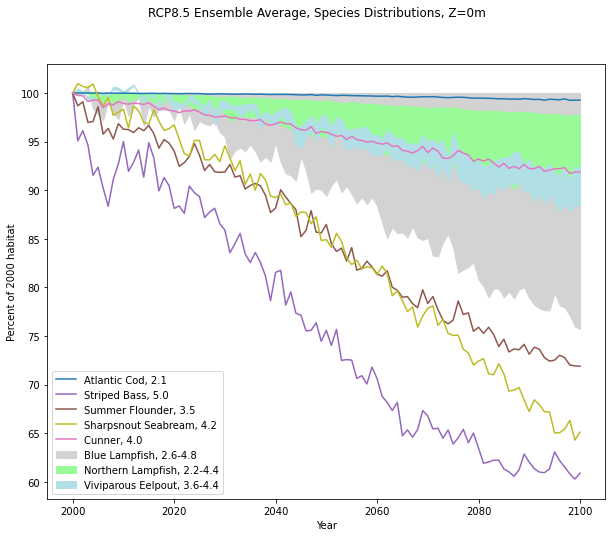

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
years = np.arange(2000,2101)
fig.suptitle('RCP8.5 Ensemble Average, Species Distributions, Z=0m')
ax.fill_between(years, blueO, blueG, color='lightgray', label='Blue Lampfish, 2.6-4.8')
ax.fill_between(years, lampO, lampG, color='palegreen', label='Northern Lampfish, 2.2-4.4')
ax.fill_between(years, eelY, eelG, color='powderblue', label='Viviparous Eelpout, 3.6-4.4')
ax.plot(np.unique(or_cod['year']),or_cod,color='tab:blue',label='Atlantic Cod, 2.1')
ax.plot(np.unique(pur_bass['year']),pur_bass,color='tab:purple',label='Striped Bass, 5.0')
ax.plot(np.unique(yel_flounder['year']),yel_flounder,color='tab:brown',label='Summer Flounder, 3.5')
ax.plot(np.unique(gr_seabream['year']),gr_seabream,color='tab:olive',label='Sharpsnout Seabream, 4.2')
ax.plot(np.unique(gr_cunner['year']),gr_cunner,color='tab:pink',label='Cunner, 4.0')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Percent of 2000 habitat')

Text(0, 0.5, 'Percent of 1990 habitat')

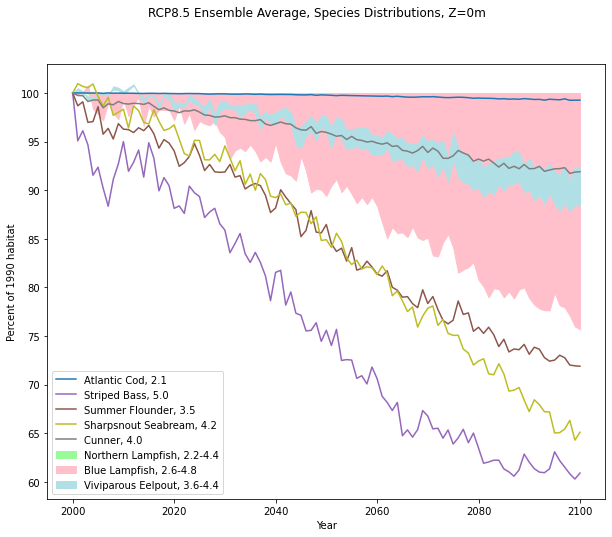

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
years = np.arange(2000,2101)
fig.suptitle('RCP8.5 Ensemble Average, Species Distributions, Z=0m')
ax.plot(np.unique(or_cod['year']),or_cod,color='tab:blue',label='Atlantic Cod, 2.1')
ax.plot(np.unique(pur_bass['year']),pur_bass,color='tab:purple',label='Striped Bass, 5.0')
ax.plot(np.unique(yel_flounder['year']),yel_flounder,color='tab:brown',label='Summer Flounder, 3.5')
ax.plot(np.unique(gr_seabream['year']),gr_seabream,color='tab:olive',label='Sharpsnout Seabream, 4.2')
ax.fill_between(years, lampO, lampG, color='palegreen', label='Northern Lampfish, 2.2-4.4')
ax.fill_between(years, blueO, blueG, color='pink', label='Blue Lampfish, 2.6-4.8')
ax.plot(np.unique(gr_cunner['year']),gr_cunner,color='tab:gray',label='Cunner, 4.0')
ax.fill_between(years, eelY, eelG, color='powderblue', label='Viviparous Eelpout, 3.6-4.4')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Percent of 1990 habitat')

Text(0, 0.5, 'Percent of 1990 habitat')

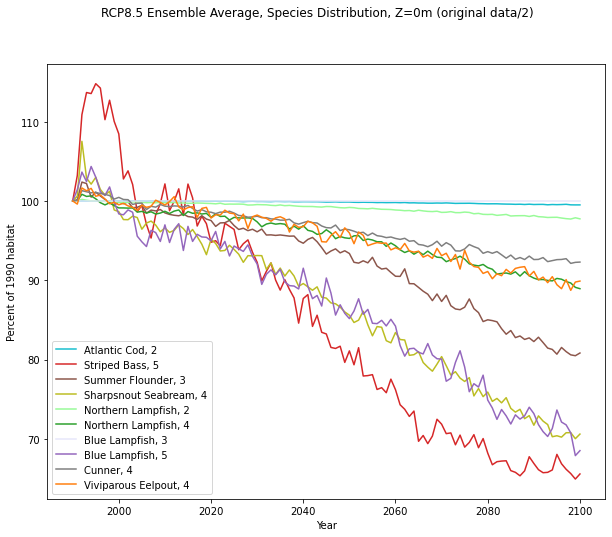

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Ensemble Average, Species Distribution, Z=0m (original data/2)')
ax.plot(np.unique(or_cod['year']),or_cod,color='tab:cyan',label='Atlantic Cod, 2')
ax.plot(np.unique(pur_bass['year']),pur_bass,color='tab:red',label='Striped Bass, 5')
ax.plot(np.unique(yel_flounder['year']),yel_flounder,color='tab:brown',label='Summer Flounder, 3')
ax.plot(np.unique(gr_seabream['year']),gr_seabream,color='tab:olive',label='Sharpsnout Seabream, 4')
ax.plot(np.unique(or_lamp['year']),or_lamp,color='palegreen',label='Northern Lampfish, 2')
ax.plot(np.unique(gr_lamp['year']),gr_lamp,color='tab:green',label='Northern Lampfish, 4')
ax.plot(np.unique(yel_blue['year']),yel_blue,color='lavender',label='Blue Lampfish, 3')
ax.plot(np.unique(pur_blue['year']),pur_blue,color='tab:purple',label='Blue Lampfish, 5')
ax.plot(np.unique(gr_cunner['year']),gr_cunner,color='tab:gray',label='Cunner, 4')
ax.plot(np.unique(gr_eel['year']),gr_eel,color='tab:orange',label='Viviparous Eelpout, 4')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Percent of 1990 habitat')

Text(0, 0.5, 'Habitable Percent of Distribution')

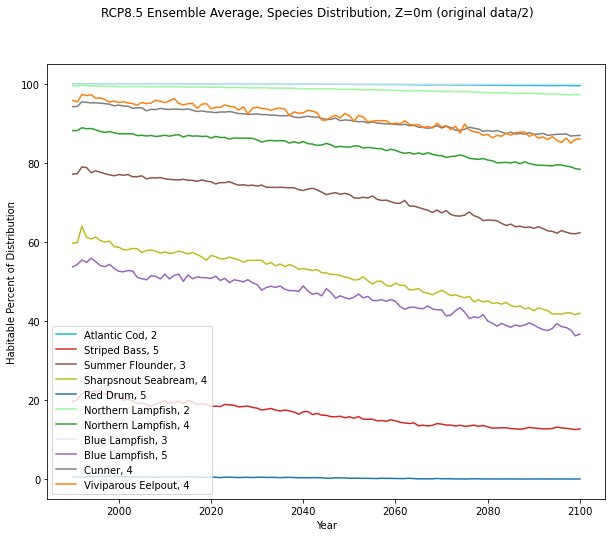

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Ensemble Average, Species Distribution, Z=0m (original data/2)')
ax.plot(np.unique(or_cod2['year']),or_cod2,color='tab:cyan',label='Atlantic Cod, 2')
ax.plot(np.unique(pur_bass2['year']),pur_bass2,color='tab:red',label='Striped Bass, 5')
ax.plot(np.unique(yel_flounder2['year']),yel_flounder2,color='tab:brown',label='Summer Flounder, 3')
ax.plot(np.unique(gr_seabream2['year']),gr_seabream2,color='tab:olive',label='Sharpsnout Seabream, 4')
ax.plot(np.unique(pur_drum2['year']),pur_drum2,color='tab:blue',label='Red Drum, 5')
ax.plot(np.unique(or_lamp2['year']),or_lamp2,color='palegreen',label='Northern Lampfish, 2')
ax.plot(np.unique(gr_lamp2['year']),gr_lamp2,color='tab:green',label='Northern Lampfish, 4')
ax.plot(np.unique(yel_blue2['year']),yel_blue2,color='lavender',label='Blue Lampfish, 3')
ax.plot(np.unique(pur_blue2['year']),pur_blue2,color='tab:purple',label='Blue Lampfish, 5')
ax.plot(np.unique(gr_cunner2['year']),gr_cunner2,color='tab:gray',label='Cunner, 4')
ax.plot(np.unique(gr_eel2['year']),gr_eel2,color='tab:orange',label='Viviparous Eelpout, 4')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Habitable Percent of Distribution')